# 1.Data Loading and Data Exploration 

First, load your data and understand its structure. We'll select the most relevant features for segmentation.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\SANTHOSH\Downloads\Mall_Customers.csv")
df



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
# Select the relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [11]:
print(X[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [14]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [16]:
df.index

RangeIndex(start=0, stop=200, step=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
df.sample(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
23,24,Male,31,25,73
16,17,Female,35,21,35
74,75,Male,59,54,47
168,169,Female,36,87,27
117,118,Female,49,65,59
73,74,Female,60,50,56
188,189,Female,41,103,17


# 2.Detect errors or missing values

In [20]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [24]:
df.drop_duplicates()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 3.Data Preprocessing

Clustering algorithms like K-Means are distance-based, meaning the scale of features matters. A feature with a large scale (like annual income) can dominate one with a smaller scale. We use StandardScaler to give all features equal importance.



In [25]:
from sklearn.preprocessing import StandardScaler

# Scale the data to have a mean of 0 and standard deviation of 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Finding the Optimal Number of Clusters (Elbow Method) 

A key question for K-Means is "how many clusters (k) should we use?". The Elbow Method helps us decide. We run K-Means for a range of k values and plot the "within-cluster sum of squares" (WCSS). The "elbow" of the curve indicates the optimal k.

C:\ProgramData\anaconda3\anaconda 1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\anaconda 1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\anaconda 1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\anaconda 1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

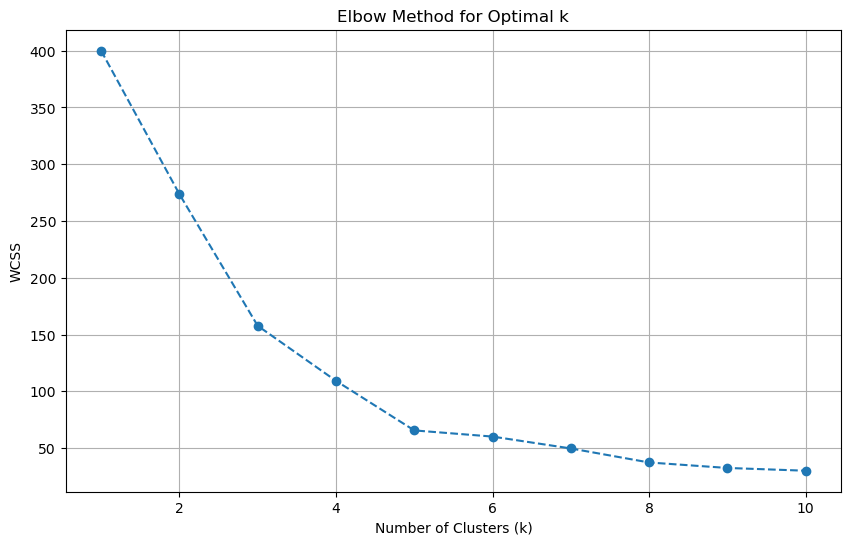

In [26]:
from sklearn.cluster import KMeans

wcss = []
# Test k values from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

From the plot, you'll likely see the elbow at k=5. This is our optimal number of clusters.

# 4. Building and Applying the K-Means Model 

Now that we know the optimal k, we can build our final clustering model.

In [27]:
# Build the K-Means model with the optimal number of clusters (k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Fit the model and predict the cluster for each data point
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to the original dataframe
df['Cluster'] = y_kmeans

C:\ProgramData\anaconda3\anaconda 1\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 5. Interpreting and Visualizing the Clusters

This is the most important step: turning data into business insights. We'll visualize the clusters and create personas for each segment.

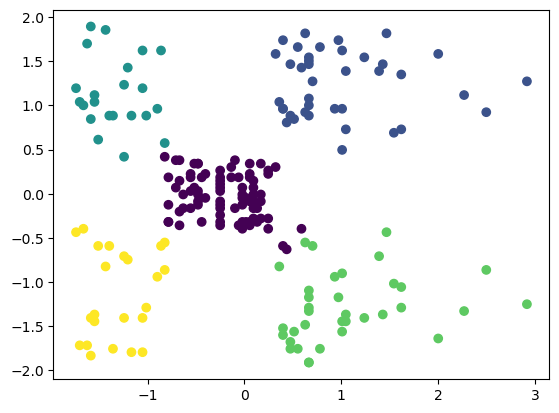

In [29]:
import matplotlib.pyplot as plt

# Assuming X_scaled (your data) and y_kmeans (the cluster labels 0,1,2,3,4)
# are already defined from your K-Means model.

# This single line creates the scatter plot with different colors for each cluster.
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans)

# This line displays the plot.
plt.show()

# What's the Use of this project

The main purpose of the Customer Segmentation project is to stop treating all customers the same and instead tailor business strategies to specific groups.

By dividing your customer base into distinct segments, you can:

Market More Effectively: Create targeted campaigns that resonate with each group's specific needs and behaviors.

Develop Better Products: Design products and services that a particular customer segment actually wants.

Personalize the Customer Experience: Customize interactions to make customers feel understood and valued.

Optimize Pricing: Implement pricing strategies that align with each segment's willingness to pay.

Ultimately, this data-driven approach leads to higher profits and happier, more loyal customers.